In [2]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C:/Users/USER/Desktop/Stears Data Analysis Project/no_null_paystack_checkout_transactions.csv')

In [4]:
df.head()

,id,status,currency,country_code,country_name
0,1,failed,USD,US,United States
1,2,success,NGN,NG,Nigeria
2,4,success,NGN,NG,Nigeria
3,5,abandoned,NGN,NG,Nigeria
4,7,success,NGN,NG,Nigeria


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961 entries, 0 to 1960
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1961 non-null   int64 
 1   status        1961 non-null   object
 2   currency      1961 non-null   object
 3   country_code  1959 non-null   object
 4   country_name  1961 non-null   object
dtypes: int64(1), object(4)
memory usage: 76.7+ KB


In [6]:
df.isna().sum()

id              0
status          0
currency        0
country_code    2
country_name    0
dtype: int64

In [7]:
df.shape

(1961, 5)

<AxesSubplot:>

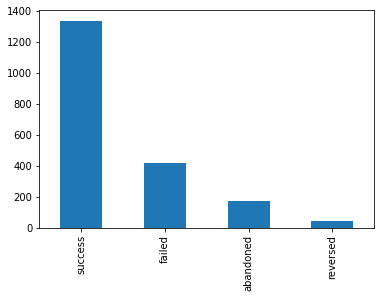

In [7]:
df['status'].value_counts().plot(kind='bar')

<AxesSubplot:>

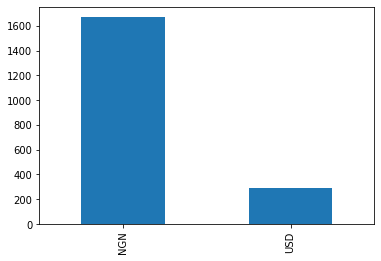

In [8]:
df['currency'].value_counts().plot(kind='bar')

<AxesSubplot:>

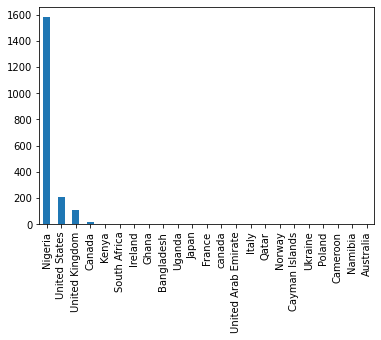

In [10]:
df['country_name'].value_counts().plot(kind='bar')

In [11]:
df2 = df.copy()

In [12]:
df2.head()

,id,status,currency,country_name
0,1,failed,USD,United States
1,2,success,NGN,Nigeria
2,4,success,NGN,Nigeria
3,5,abandoned,NGN,Nigeria
4,7,success,NGN,Nigeria


In [13]:
df2.status = np.where(df2.status == "success", 1, 0)
df2.status.value_counts()

1    1336
0     625
Name: status, dtype: int64

AttributeError: module 'matplotlib' has no attribute 'title'

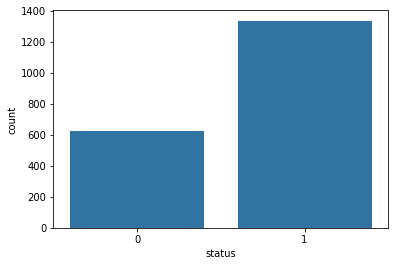

In [14]:
# plot a bar chart
base_color = sns.color_palette()[0]
sns.countplot(data = df2, x = 'status', color = base_color)
plt.title('Subscriber Status')
plt.xticks([0, 1], ['Not Successful', 'Successful'])
plt.xlabel('Status')
plt.ylabel('Number of Subscriber')

In [16]:
df.head()

,id,status,currency,country_name
0,1,failed,USD,United States
1,2,success,NGN,Nigeria
2,4,success,NGN,Nigeria
3,5,abandoned,NGN,Nigeria
4,7,success,NGN,Nigeria


In [31]:
df.groupby(['currency', 'country_name']).status.value_counts(normalize=True)

currency  country_name         status   
NGN       Australia            failed       1.000000
          Bangladesh           failed       1.000000
          Canada               failed       0.625000
                               success      0.375000
          France               success      1.000000
          Ghana                success      0.666667
                               abandoned    0.333333
          Ireland              success      1.000000
          Nigeria              success      0.739691
                               failed       0.173969
                               abandoned    0.063789
                               reversed     0.022552
          Norway               success      1.000000
          South Africa         abandoned    0.500000
                               success      0.500000
          Uganda               success      0.666667
                               reversed     0.333333
          United Kingdom       success      0.560000
     

In [52]:
df.groupby(["currency", "country_name", "status"])

<AxesSubplot:xlabel='currency,country_name'>

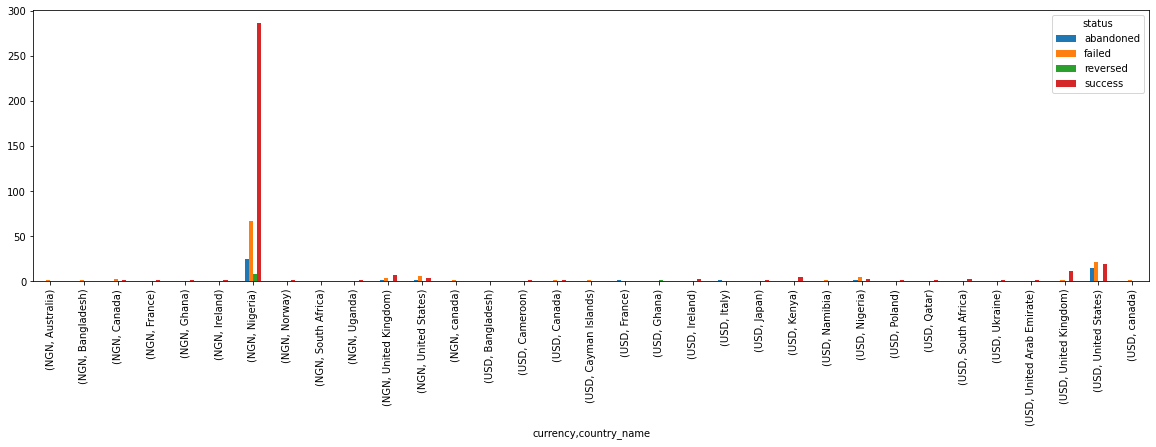

In [51]:
df.groupby(["currency", "country_name", "status"]).size().unstack().apply(lambda x: x/x.count(), axis=1).plot(kind='bar', figsize=(20,5))

<AxesSubplot:xlabel='status,currency,country_name'>

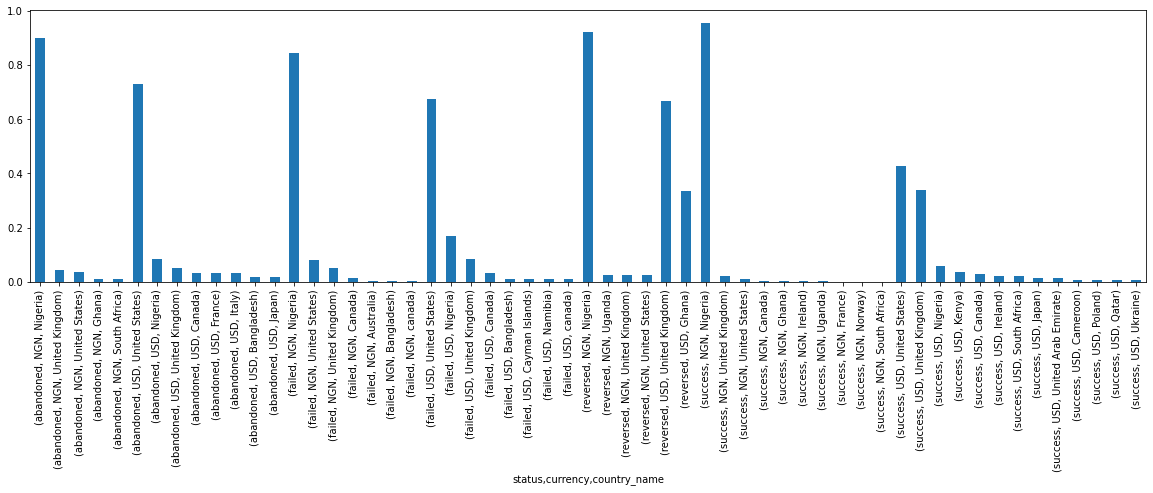

In [58]:
df.groupby(['status', 'currency']).country_name.value_counts(normalize=True).plot(kind='bar', figsize=(20,5))

<AxesSubplot:xlabel='currency,country_name,status'>

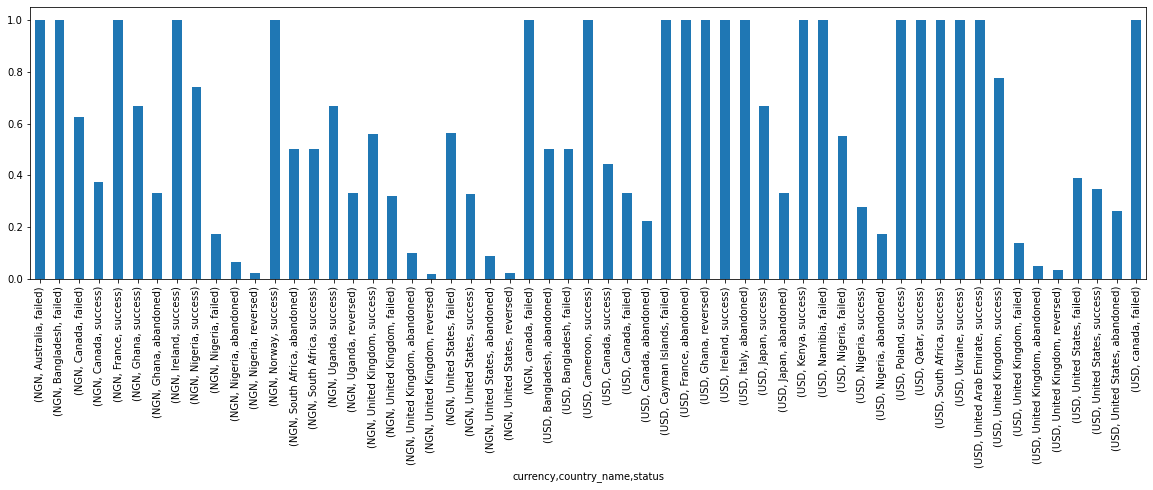

In [56]:
df.groupby(['currency', 'country_name']).status.value_counts(normalize=True).plot(kind='bar', figsize=(20,5))

<AxesSubplot:xlabel='currency,country_name,status'>

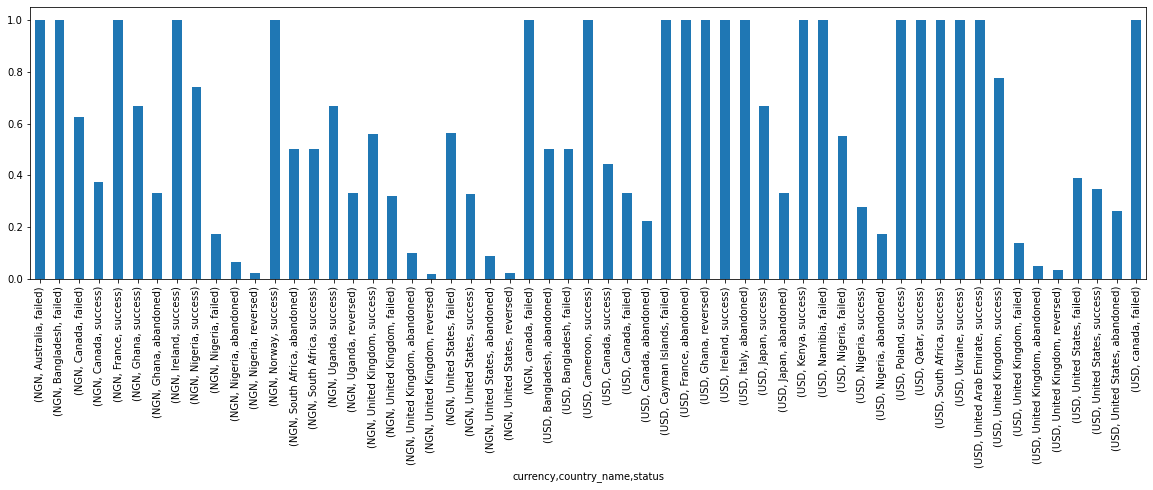

In [49]:
df.groupby(['currency', 'country_name']).status.value_counts(normalize=True).plot(kind='bar', figsize=(20,5))

In [29]:
df.groupby('currency').status.value_counts(normalize=True)

currency  status   
NGN       success      0.719928
          failed       0.191502
          abandoned    0.065829
          reversed     0.022741
USD       success      0.458621
          failed       0.327586
          abandoned    0.203448
          reversed     0.010345
Name: status, dtype: float64

<AxesSubplot:xlabel='currency,status'>

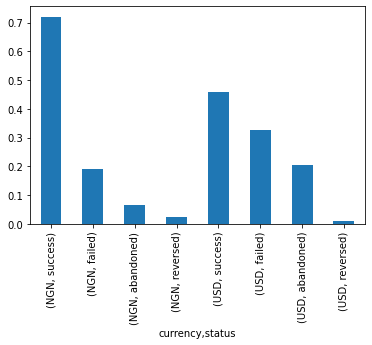

In [32]:
df.groupby('currency').status.value_counts(normalize=True).plot(kind='bar')

AttributeError: module 'matplotlib' has no attribute 'title'

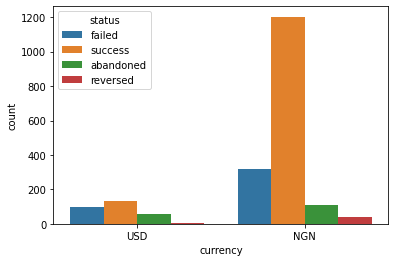

In [36]:
sns.countplot(x=df['currency'], hue=df['status']);
plt.title('NGN vs USD');

In [34]:
import matplotlib
print(matplotlib.__version__)

3.5.1


In [39]:
sns.barplot(x=df['status'], y=['currency'], hue=['country_name'], data=df, saturation=0.8)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<AxesSubplot:xlabel='country_name,currency'>

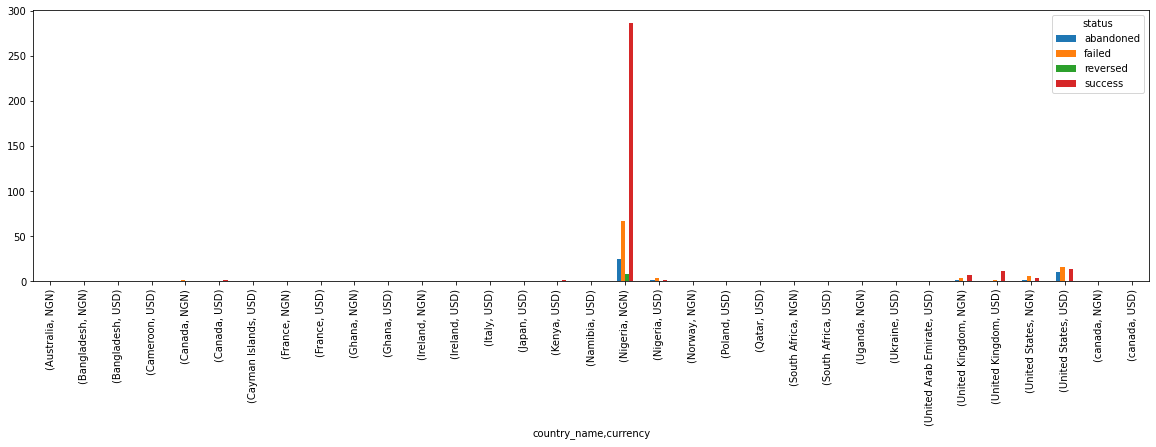

In [47]:
df.groupby(["country_name", "currency", "status"]).size().unstack().fillna(0).apply(lambda x: x/x.count(), axis=1).plot(kind='bar', figsize=(20,5))

In [ ]:
# A functionthat finds the median of the values it receives
import numpy as np

def median(values):
    n = len(values)
    s = sorted(values)
    return (s[n//2-1]/2.0+s[n//2]/2.0, s[n//2])[n%2] if n else None

values = [1, 2, 6]
print(median(values))

In [ ]:
import numpy as np

def median(values):
    n = len(values)
    s = sorted(values)
    return np.median([s])

values = [1, 2, 6]
print(median(values))

In [ ]:
students = [("Allen Anderson", "Computer Science"),
            ("Edgar Einstein", "Engineering"),
            ("Farrah Finn", "Fine Arts")]
     

def add_new_student(students, name, major):
    students.append((name, major))

def update_student(students, index, name, major):
    students[index] = (name, major)

def find_students_by_name(students, name):
    return [student for student in students if name in student[0]]

def get_all_majors(students):
    return [student[1] for student in students]


In [ ]:
"""
Implement a group_by_owners function that:

Accepts a dictionary containing the file owner name for each file name.
Returns a dictionary containing a list of file names for each owner name, in any order.
For example, for dictionary {'Input.txt': 'Randy', 'Code.py': 'Stan', 'Output.txt': 'Randy'} the group_by_owners function should return {'Randy': ['Input.txt', 'Output.txt'], 'Stan': ['Code.py']}.


def group_by_owners(files):
    return None

if __name__ == "__main__":    
    files = {
        'Input.txt': 'Randy',
        'Code.py': 'Stan',
        'Output.txt': 'Randy'
    }   
    print(group_by_owners(files))
"""

from collections import defaultdict


def group_by_owners(files):
    owners = defaultdict(list)
    for file, owner in files.items():
        owners[owner].append(file)
    return owners


files = {
    'Input.txt': 'Randy',
    'Code.py': 'Stan',
    'Output.txt': 'Randy'
}
print(group_by_owners(files))